In [26]:
!pip install opencv-python
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras import Sequential
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [27]:
from keras.preprocessing.image import ImageDataGenerator
import os

# Use double backslashes or forward slashes in the file paths
train_dataset_path = "E:\\PROJECT\\Intro-To-ML-GDSC-IITK-2\\Week4\\train"
test_dataset_path = "E:\\PROJECT\\Intro-To-ML-GDSC-IITK-2\\Week4\\test"

# Alternatively, you can use forward slashes
# train_dataset_path = "E:/PROJECT/Intro-To-ML-GDSC-IITK-2/Week4/train"
# test_dataset_path = "E:/PROJECT/Intro-To-ML-GDSC-IITK-2/Week4/test"

# Create ImageDataGenerator instances
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

# Load data from directories
train_dataset = train_datagen.flow_from_directory(
    train_dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_dataset = test_datagen.flow_from_directory(
    test_dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [28]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for Cat or 1 for Dog 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))


In [29]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Now you can train the model
model.fit_generator(train_dataset,
                    steps_per_epoch=2,
                    epochs=70,
                    validation_data=test_dataset)




C:\Users\HP\AppData\Local\Temp\ipykernel_1668\518519539.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_dataset,


Epoch 1/70
2/2 [==============================] - 25s 13s/step - loss: 0.6935 - accuracy: 0.5938 - val_loss: 1.1544 - val_accuracy: 0.5000
Epoch 2/70
2/2 [==============================] - 19s 13s/step - loss: 0.9191 - accuracy: 0.5156 - val_loss: 0.7104 - val_accuracy: 0.5000
Epoch 3/70
2/2 [==============================] - 19s 12s/step - loss: 0.6910 - accuracy: 0.5625 - val_loss: 0.6973 - val_accuracy: 0.5000
Epoch 4/70
2/2 [==============================] - 14s 9s/step - loss: 0.6991 - accuracy: 0.4844 - val_loss: 0.6929 - val_accuracy: 0.5500
Epoch 5/70
2/2 [==============================] - 17s 13s/step - loss: 0.6943 - accuracy: 0.4844 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 6/70
2/2 [==============================] - 19s 13s/step - loss: 0.6927 - accuracy: 0.5156 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 7/70
2/2 [==============================] - 16s 11s/step - loss: 0.6868 - accuracy: 0.5333 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 8/70
2/2 [============

In [30]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("DOG",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("CAT",fontsize=30)



1/1 [==============================] - 2s 2s/step
[[0.]]


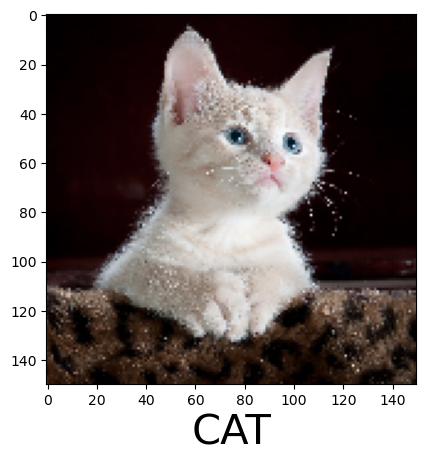

In [31]:
predictImage("E:\cat1.jpg")

1/1 [==============================] - 0s 231ms/step
[[0.]]


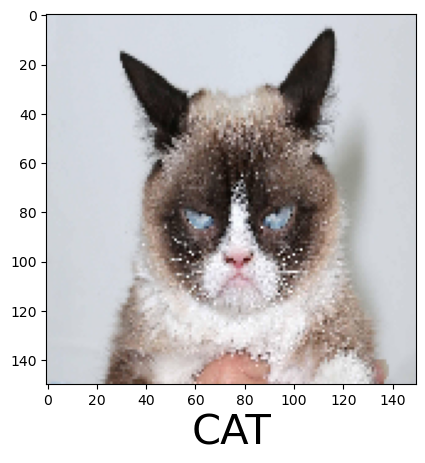

In [32]:
predictImage("E:/PROJECT/Intro-To-ML-GDSC-IITK-2/Week4/train/cats/cat_15.jpg")

1/1 [==============================] - 0s 78ms/step
[[1.]]


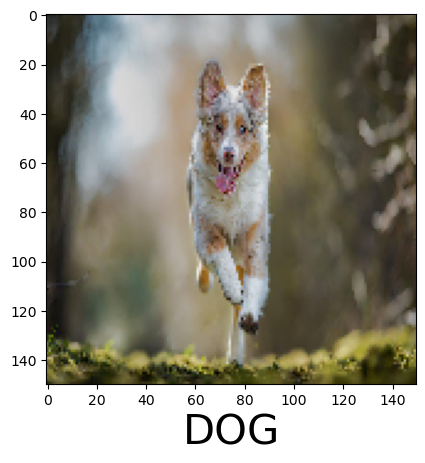

In [21]:
predictImage("E:/PROJECT/Intro-To-ML-GDSC-IITK-2/Week4/train/dogs/dog_0.jpg")